In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [2]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Intensity/CSV/Harris_No_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-2-45586fbbe52f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-2-45586fbbe52f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,8387460.0,8182950.0,7413870.0,6560895.0,6201600.0,5718120.0,5478675.0,5391210.0,5164770.0,4852650.0,...,6988275.0,7047435.0,7063245.0,8062335.0,6954105.0,5475870.0,4732545.0,5461845.0,6606030.0,1
1,7926930.0,6828900.0,6209505.0,6040695.0,5905035.0,5853015.0,5612040.0,5258355.0,5859135.0,6254640.0,...,7633170.0,7233840.0,6284475.0,6943650.0,7811415.0,6442320.0,5949915.0,5768100.0,5553900.0,1
2,11175885.0,10896915.0,10621770.0,10857135.0,11167470.0,10576380.0,10460355.0,10468770.0,10571280.0,11231730.0,...,11057565.0,11205720.0,11454090.0,11670585.0,11459955.0,10980045.0,10952250.0,11203680.0,11254425.0,1
3,6038400.0,6346950.0,6706755.0,7220580.0,5976435.0,5829300.0,6578490.0,5869590.0,5935125.0,7064010.0,...,50235.0,50235.0,50235.0,50235.0,777240.0,386580.0,64515.0,66045.0,68085.0,1
4,10903290.0,9469170.0,7526580.0,6321195.0,8426985.0,9631350.0,8346915.0,10157415.0,10444290.0,10208925.0,...,11846280.0,10688070.0,10856370.0,12573285.0,7583445.0,7606395.0,11005800.0,7631385.0,5657430.0,1


In [3]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =MinMaxScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [4]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.8273809523809523
              precision    recall  f1-score   support

          -1       0.88      0.92      0.90       142
           1       0.42      0.31      0.36        26

    accuracy                           0.83       168
   macro avg       0.65      0.62      0.63       168
weighted avg       0.81      0.83      0.82       168



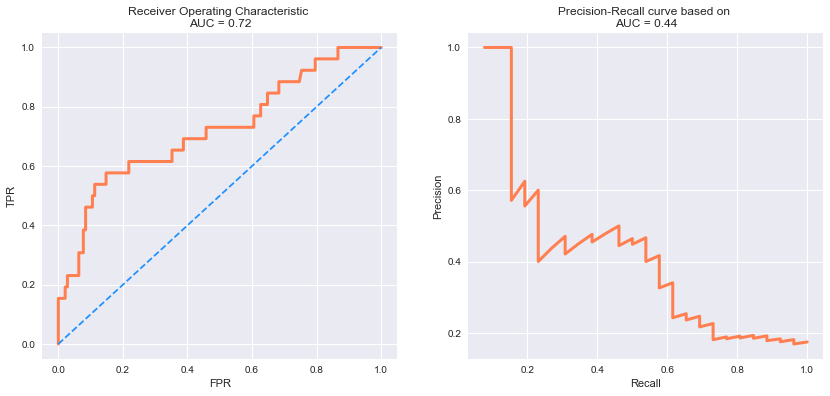

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()